<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2264/NGC_2264_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 4.9MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 2.6MB 36.8MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=4968df99cc51ec0fe676bb7658c7c7e1cb05e1d4474e5bc10836cfb1f4057d54
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC2264 center

coordinate = coord.SkyCoord.from_name('NGC2264')
print(coordinate)
radius = u.Quantity(0.6, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (100.2943, 9.8922)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 3326740453254116864,3326740453254116864,259779195,2015.5,100.297726,0.198972,9.894043,0.200222,0.773356,0.226083,3.420670,-1.576229,0.373456,-1.836557,0.339201,-0.338920,0.142497,-0.240496,0.369222,-0.422035,0.203581,-0.421140,0.252911,0.143749,-0.255410,169,0,169,0,8.837250,380.589905,1.088071,9.630992,31,False,0.424402,1.140887,0.047020,-0.122729,...,2118.893717,17.457883,121.371742,16.446648,1.979951,1,3.202810,1.628382,1.574429,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.961827,2.244435,100.420106,-13.173524,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.003842
1,1635721458409799680,Gaia DR2 3326740448959150080,3326740448959150080,143553752,2015.5,100.295219,0.105722,9.888383,0.110612,0.880038,0.128105,6.869649,-1.829032,0.201387,-4.454007,0.184396,-0.293391,0.100872,-0.258810,0.332111,-0.478130,0.129420,-0.433582,0.292435,0.187502,-0.235600,160,0,159,1,4.942362,257.102509,0.491260,5.032513,31,False,1.568391,1.184189,0.025688,-0.094452,...,3929.483310,10.651969,368.897369,15.776081,1.666614,0,3.022154,1.650896,1.371258,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.965739,2.239655,100.418001,-13.179350,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.003916
2,1635721458409799680,Gaia DR2 3326740453253731712,3326740453253731712,420142258,2015.5,100.288983,1.492078,9.897049,1.092886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.300323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,0,68,0,-0.395772,58.027672,0.000000,0.000000,3,False,0.031856,1.723187,0.244792,-0.027822,...,231.350167,17.132916,13.503257,18.851246,2.734862,0,1.892878,0.159828,1.733049,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.955215,2.238144,100.411058,-13.171154,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007147
3,1635721458409799680,Gaia DR2 3326740006577519360,3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,-0.130383,...,870721.416809,800.642651,1087.528198,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.968913,2.235852,100.416360,-13.184037,100001,9670.666992,9200.250000,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008433
4,1635721458409799680,Gaia DR2 33267404

In [6]:
all_stars[all_stars['parallax_over_error'] > 5]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
1,1635721458409799680,Gaia DR2 3326740448959150080,3326740448959150080,143553752,2015.5,100.295219,0.105722,9.888383,0.110612,0.880038,0.128105,6.869649,-1.829032,0.201387,-4.454007,0.184396,-0.293391,0.100872,-0.258810,0.332111,-0.478130,0.129420,-0.433582,0.292435,0.187502,-0.235600,160,0,159,1,4.942362,257.102509,0.491260,5.032513e+00,31,False,1.568391,1.184189,0.025688,-0.094452,...,3929.483310,10.651969,368.897369,15.776081,1.666614,0,3.022154,1.650896,1.371258,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.965739,2.239655,100.418001,-13.179350,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.003916
3,1635721458409799680,Gaia DR2 3326740006577519360,3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145e+00,31,False,37.789845,1.775599,0.013533,-0.130383,...,870721.416809,800.642651,1087.528198,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.968913,2.235852,100.416360,-13.184037,100001,9670.666992,9200.250000,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008433
5,1635721458409799680,Gaia DR2 3326740075296996608,3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.852173,0.288888,3.174382e+00,31,False,3.599010,1.383417,0.018468,-0.147385,...,5719.302505,116.444977,49.115921,15.368563,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.966781,2.231493,100.411398,-13.184484,100001,3608.004883,3417.000000,4477.879883,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,https://gea.esac.esa.int/data-server/datalink/...,,0.010309
6,1635721458409799680,Gaia DR2 3326740002281694592,3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.967285,0.141880,6.011601e+00,31,False,36.901455,1.779420,0.013208,-0.156618,...,708209.387466,1069.139316,662.410767,10.136516,1.153538,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.972026,2.238207,100.420088,-1

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


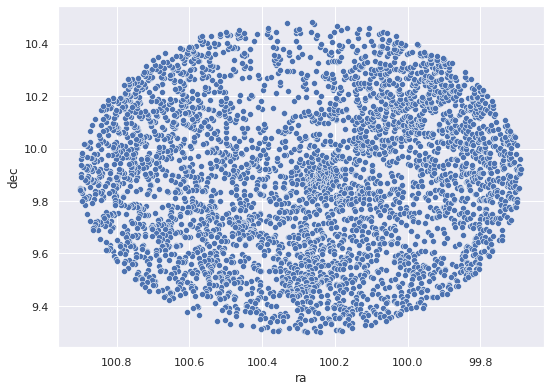

In [8]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()

#### Finding Cantat Data

In [9]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [10]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [11]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [12]:
# help(Vizier)

In [13]:
## saving only NGC 2264 data from Cantat

cantat_2264 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2264")
cantat_2264 = cantat_2264[0].to_pandas()
cantat_2264

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,100.288919,9.935567,3326741415326788480,1.3254,-1.851,-4.220,NaN,16.416100,3.1947,1.0,NGC_2264,100.288927,9.935585
1,100.268700,9.870169,3326739933563070720,1.3051,-0.975,-4.047,NaN,17.872499,2.0718,0.7,NGC_2264,100.268704,9.870186
2,100.321455,9.894364,3326740418894376704,1.2577,-1.297,-3.914,NaN,17.051701,2.4179,0.8,NGC_2264,100.321461,9.894381
3,100.293254,9.883825,3326740006577519360,1.1663,-1.773,-4.213,NaN,9.904700,-0.0007,0.8,NGC_2264,100.293262,9.883843
4,100.229922,9.847141,3326716397142282240,1.2713,-1.759,-2.658,NaN,15.305900,1.7208,0.1,NGC_2264,100.229930,9.847153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,100.139414,9.950729,3326929839837216640,1.1883,-1.923,-4.212,NaN,17.801300,2.6959,0.7,NGC_2264,100.139422,9.950747
182,100.240944,9.941617,3326929225657356288,1.3572,-1.452,-3.866,NaN,13.435300,1.1690,1.0,NGC_2264,100.240950,9.941634
183,100.190391,9.995125,3326930393888460288,1.5371,-1.218,-4.083,NaN,17.504801,2.3604,0.7,NGC_2264,100.190396,9.995143
184,100.223620,9.966662,3326929500535262464,1.4464,-1.454,-3.649,NaN,16.329500,2.0670,1.0,NGC_2264,100.223627,9.966677


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_2264 = cantat_2264.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_2264 = cantat_2264.loc[:,['source_id', 'PMemb']]


In [16]:
cantat_2264.isnull().sum()

source_id    0
PMemb        0
dtype: int64

In [17]:
# join the two table on source_id
cantat_2264 = all_stars[all_stars['parallax_over_error'] > 5].join(cantat_2264.set_index('source_id'), on='source_id')

In [18]:
cantat_2264.isnull().sum()

solution_id                0
designation                0
source_id                  0
random_index               0
ref_epoch                  0
                        ... 
lum_percentile_upper    1992
datalink_url               0
epoch_photometry_url       0
dist                       0
PMemb                   4023
Length: 98, dtype: int64

In [19]:
cantat_2264.shape

(4209, 98)

In [20]:
cantat_2264.dropna(subset=['PMemb']).shape

(186, 98)

In [21]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2264 = cantat_2264.dropna(subset=['PMemb'])
cantat_2264

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
3,1635721458409799680,Gaia DR2 3326740006577519360,3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,-0.130383,...,800.642651,1087.528198,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.968913,2.235852,100.416360,-13.184037,100001,9670.666992,9200.250000,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008433,0.8
5,1635721458409799680,Gaia DR2 3326740075296996608,3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.852173,0.288888,3.174382,31,False,3.599010,1.383417,0.018468,-0.147385,...,116.444977,49.115921,15.368563,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.966781,2.231493,100.411398,-13.184484,100001,3608.004883,3417.000000,4477.879883,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,https://gea.esac.esa.int/data-server/datalink/...,,0.010309,1.0
6,1635721458409799680,Gaia DR2 3326740002281694592,3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.967285,0.141880,6.011601,31,False,36.901455,1.779420,0.013208,-0.156618,...,1069.139316,662.410767,10.136516,1.153538,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.972026,2.238207,100.420088,-13.185468,100002,8748.333008,7420.000000,9705.000000,0.0870,0.0379,0.2241,0.0435,0.0146,0.1121,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.010362,1.0
7,1635721458409799680,Gaia DR2 3326740075296996736,3326740075296996736,289548265,2015.5,100.286887,0.092189,9.883634,0.082626,1.443122,0.093037,15.511223,-1.464500,0.173904,-3.853637,0.155394,-0.247701,0.274339,-0.372806,0.185210,-0.295910,0.125538,-0.424320,0.115379,0.086176,-0.158110,161,0,161,0,2.295916,199.383438,0.270272,1.541566,31,False,2.265055,1.282532,0.021110,-0.098726,...,377.033814,8.745747,15.966477,1.635123,0,2.294858,1.039610,1.255248,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.966218,2.230183,100.409948,-13.184684,<NA>,NaN,NaN,Na

In [22]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2264.to_csv('NGC_2264_cantat.csv')
# all_stars.to_csv('NGC_2264_Gaia_30m.csv')

In [23]:
cantat_2264.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,1.860000e+02,1.860000e+02,1.860000e+02,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,181.000000,186.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,186.000000,181.000000,181.000000,181.000000,3.000000,3.000000,186.000000,3.000000,3.000000,3.0,186.000000,186.000000,186.000000,186.000000,144.000000,144.000000,144.000000,144.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,186.000000,186.000000
mean,1.635721e+18,3.326784e+18,8.280865e+08,2015.5,100.213468,0.072569,9.878067,0.071833,1.351573,0.082092,21.600460,-1.713496,0.141594,-3.743843,0.125631,-0.124861,-0.013726,-0.229716,0.284783,-0.384964,0.183260,-0.358689,0.201911,0.089182,-0.101047,152.795699,16.935484,151.849462,0.946237,4.115653,297.708801,0.212232,4.696803,31.0,28.146078,1.399801,0.018506,-0.034812,17.408602,10.634409,...,16.386187,15.182796,1.233644e+05,344.702351,186.840729,14.525523,1.473558,0.129032,1.860670,0.859732,1.000938,17.663946,6.709235,0.102151,5833.333496,3.833333,0.0,202.938125,2.163288,100.336265,-13.195483,100556.638889,4531.785645,4245.856934,4903.776855,1.747458,1.442371,1.986919,0.877488,0.713944,1.003771,200111.0,1.408721,1.217725,1.548704,1.195101,1.119065,1.271138,0.104799,0.862365
std,0.000000e+00,8.928187e+13,5.066211e+08,0.0,0.061261,0.039365,0.063839,0.039039,0.098563,0.044521,10.954170,0.445249,0.075890,0.300878,0.066840,0.170140,0.137864,0.135644,0.134800,0.126800,0.131831,0.117655,0.115029,0.110401,0.184023,17.309931,47.414402,17.351655,1.487720,8.044185,624.008545,0.227853,18.451157,0.0,72.081253,0.133535,0.009988,0.079043,1.949284,0.678392,...,2.409868,3.662657,4.757823e+05,939.250760,185.163849,1.783509,0.223517,0.408711,0.683421,0.381192,0.347672,6.235787,4.756371,0.808934,288.675140,0.577350,0.0,0.057887,0.066118,0.061034,0.064705,898.928007,1413.615601,1237.765991,1462.936523,0.987902,0.909715,1.042373,0.494933,0.455351,0.527763,0.0,0.618332,0.618088,0.611171,3.740212,3.529193,3.951503,0.057036,0.208165
min,1.635721e+18,3.326712e+18,5.929410e+05,2015.5,100.057096,0.023724,9.751314,0.022577,1.092609,0.026016,6.027352,-3.389699,0.045983,-5.199818,0.041781,-0.960296,-0.685270,-0.885211,-0.377267,-0.702543,-0.271878,-0.933394,-0.694126,-0.667703,-0.896725,105.000000,0.000000,101.000000,0.000000,-6.4971

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


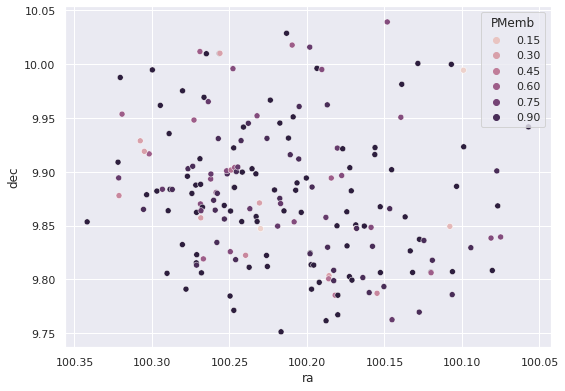

In [24]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_2264['ra'], cantat_2264['dec'], hue = cantat_2264['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [25]:
# import member dataset
member = cantat_2264.copy()

In [26]:
### adding their distance from the center of the clusters

## NGC 2264
center = coord.SkyCoord.from_name('NGC2264')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_2264_center'] = distance

In [27]:
member['PMemb'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb,dist_2264_center
3,1635721458409799680,Gaia DR2 3326740006577519360,3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,-0.130383,...,1087.528198,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.968913,2.235852,100.416360,-13.184037,100001,9670.666992,9200.25,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008433,1,0.008438
5,1635721458409799680,Gaia DR2 3326740075296996608,3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.852173,0.288888,3.174382,31,False,3.599010,1.383417,0.018468,-0.147385,...,49.115921,15.368563,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.966781,2.231493,100.411398,-13.184484,100001,3608.004883,3417.00,4477.879883,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,https://gea.esac.esa.int/data-server/datalink/...,,0.010309,1,0.010310
6,1635721458409799680,Gaia DR2 3326740002281694592,3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.967285,0.141880,6.011601,31,False,36.901455,1.779420,0.013208,-0.156618,...,662.410767,10.136516,1.153538,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.972026,2.238207,100.420088,-13.185468,100002,8748.333008,7420.00,9705.000000,0.0870,0.0379,0.2241,0.0435,0.0146,0.1121,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.010362,1,0.010370
7,1635721458409799680,Gaia DR2 3326740075296996736,3326740075296996736,289548265,2015.5,100.286887,0.092189,9.883634,0.082626,1.443122,0.093037,15.511223,-1.464500,0.173904,-3.853637,0.155394,-0.247701,0.274339,-0.372806,0.185210,-0.295910,0.125538,-0.424320,0.115379,0.086176,-0.158110,161,0,161,0,2.295916,199.383438,0.270272,1.541566,31,False,2.265055,1.282532,0.021110,-0.098726,...,8.745747,15.966477,1.635123,0,2.294858,1.039610,1.255248,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.966218,2.230183,100.409948,-13.184684,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,

In [28]:
### adding their distance from the center of the clusters

## NGC 2264
center = coord.SkyCoord.from_name('NGC2264')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_2264_center'] = distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


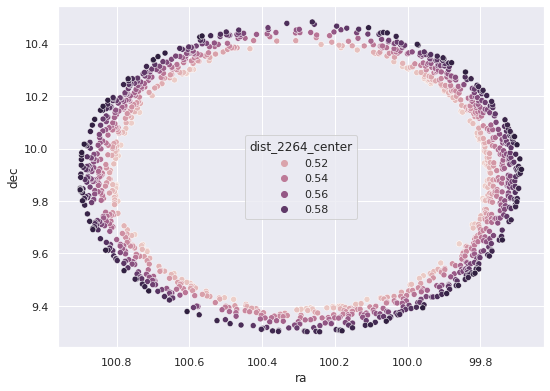

In [29]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_2264_center', 
                          data = all_stars_filtered[all_stars_filtered.dist_2264_center >= 0.5])
skyplot.invert_xaxis()

In [30]:
non_member = all_stars_filtered[all_stars_filtered['dist_2264_center'] >= 0.5].sample(len(member))

In [31]:
non_member['PMemb'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2264_center,PMemb
20289,1635721458409799680,Gaia DR2 3350752992635405184,3350752992635405184,1160409868,2015.5,100.805963,0.501035,10.003295,0.512579,3.016722,0.436340,6.913697,-6.950018,0.795101,-17.856367,0.747811,-0.708762,0.179327,-0.534996,0.704116,-0.344436,0.526581,-0.711218,0.261926,0.090530,-0.532721,96,0,95,1,2.176855,121.661751,1.083415,2.657578,31,False,0.239503,1.197859,0.110831,-0.045251,...,67.047493,17.349850,1.586805,1,2.915239,1.608013,1.307226,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,203.092850,2.739810,100.924248,-13.027139,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.516065,0.515986,0
24991,1635721458409799680,Gaia DR2 3326729148900292608,3326729148900292608,49112641,2015.5,100.863339,0.048419,9.880216,0.047837,0.540191,0.050129,10.776052,-5.704280,0.094585,0.238055,0.087543,-0.422617,0.067368,-0.307605,0.328469,-0.332823,0.259882,-0.384488,0.111737,0.007734,-0.306149,122,0,121,1,-1.725983,91.078049,0.000000,0.000000,31,False,12.481468,1.547380,0.012557,-0.194015,...,475.401245,14.950511,1.254460,0,1.175685,0.501657,0.674028,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,203.228319,2.734122,100.991799,-13.145516,100001,4896.000000,4820.000000,5008.969727,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.770915,1.691935,1.827201,1.623513,1.292580,1.954445,https://gea.esac.esa.int/data-server/datalink/...,,0.560711,0.560728,0
29346,1635721458409799680,Gaia DR2 3350756669128011520,3350756669128011520,1255467438,2015.5,100.844568,0.207526,10.146247,0.182843,2.156469,0.196070,10.998487,9.088349,0.403796,-7.095013,0.313516,-0.124596,0.024269,-0.442233,0.261918,-0.150834,0.242555,-0.499027,0.214096,-0.097077,0.038459,116,0,115,1,1.858154,139.145569,0.497303,1.686185,31,False,0.768828,1.319754,0.050038,0.138041,...,67.851997,16.815044,1.502654,1,2.357121,1.183136,1.173985,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.982719,2.838702,100.951891,-12.881694,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.598469,0.598279,0
25059,1635721458409799680,Gaia DR2 3326611501156329344,3326611501156329344,1011585917,2015.5,99.850804,0.033918,9.540079,0.037511,0.262653,0.046957,5.593525,-0.240282,0.073097,-1.181523,0.077985,-0.136546,0.039434,0.019331,0.018787,-0.528789,-0.076290,-0.087323,0.135358,0.255523,-0.348735,123,0,123,0,-2.255371,86.091408,0.000000,0.000000,31,False,24.468222,1.606011,0.008756,-0.109674,...,596.178284,14.418764,1.219890,0,0.795172,0.307511,0.487660,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,203.075416,1.690854,99.994511,-13.558086,100001,5854.435059,5544.725098,6102.000000,0.759,0.2985,1.7347,0.4012,0.1829,0.9571,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.es

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


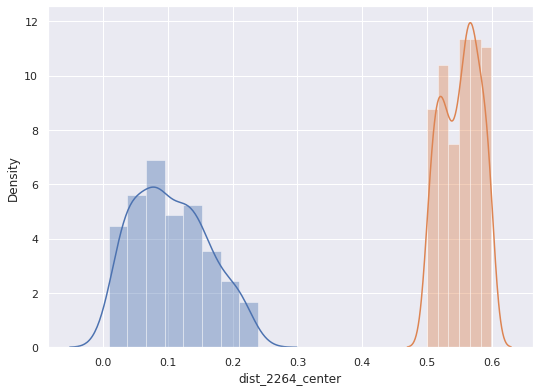

In [32]:
sns.distplot(member['dist_2264_center'])
sns.distplot(non_member['dist_2264_center'])

In [33]:
training_data = pd.concat([member, non_member])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


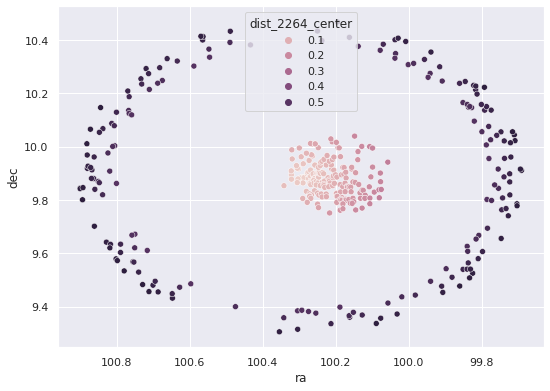

In [34]:
skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_2264_center', 
                          data = training_data)
skyplot.invert_xaxis()

In [35]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_2264_center
count,3.720000e+02,3.720000e+02,3.720000e+02,372.0,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.0,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,...,372.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,372.000000,365.000000,365.000000,365.000000,14.000000,14.000000,372.000000,14.000000,14.000000,14.0,372.000000,372.000000,372.000000,372.000000,278.00000,278.000000,278.000000,278.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,372.000000,372.000000,372.000000
mean,1.635721e+18,3.329375e+18,8.312595e+08,2015.5,100.239292,0.078353,9.887034,0.077655,1.245690,0.087746,18.399019,-1.799922,0.154460,-4.594361,0.139902,-0.173381,0.019900,-0.189312,0.261033,-0.370518,0.162468,-0.312020,0.195720,0.089329,-0.157800,145.602151,14.104839,144.741935,0.860215,2.775046,238.303116,0.172475,3.618100,31.0,32.560448,1.426542,0.019637,-0.064302,16.580645,10.478495,...,14.620968,8.245273e+04,208.132400,292.085785,14.735663,1.405794,0.115591,1.747569,0.817847,0.929723,16.018349,3.139190,0.196237,5428.571289,3.785714,0.0,202.941651,2.190066,100.361648,-13.184356,100303.23741,4623.657227,4394.393555,4944.726562,1.347525,1.092112,1.662036,0.674883,0.541473,0.840095,200111.0,2.328496,2.078952,2.518114,5.730311,4.843623,6.616998,0.328595,0.500000,0.328589
std,0.000000e+00,7.453479e+15,4.980782e+08,0.0,0.319031,0.058582,0.242441,0.058836,0.785675,0.061936,12.839125,7.111032,0.112396,7.427677,0.104934,0.178053,0.145645,0.187117,0.185002,0.132771,0.183669,0.185233,0.118445,0.114425,0.200417,19.209381,42.650176,19.135439,1.360525,6.839483,469.922943,0.233644,16.827381,0.0,77.087654,0.123313,0.014112,0.090644,2.142234,0.771507,...,3.316851,3.506450e+05,689.710541,255.889847,1.752300,0.189344,0.374488,0.642975,0.367401,0.306014,25.072683,3.998209,1.034023,682.392395,0.671230,0.0,0.260693,0.299489,0.322633,0.242629,717.54050,1162.965698,1047.932373,1195.937134,0.927151,0.852314,0.972455,0.465620,0.426206,0.492108,0.0,3.879403,3.567412,4.265610,24.469856,19.923794,29.068266,0.228600,0.500673,0.228597
min,1.635721e+18,3.326590e+18,5.929410e+05,2015.5,99.690608,0.020246,9.305953,0.019645,0.178120,0.021855,5.028831,-82.123932,0.038585,-77.647344,0.034556,-0.960296,-0.685270,-0.885211,-0.914450,-0.702543,-0.918512,-0.933394,-0.694126,-0.667703,-0.971166,91.000000,0.000000,90.000000,0.00000

In [36]:
# correlation of PMemb with other variables
training_data.corr().PMemb.dropna().sort_values()

dist                               -0.980306
dist_2264_center                   -0.980298
phot_g_mean_flux_over_error        -0.504617
phot_rp_mean_flux_over_error       -0.408483
source_id                          -0.348066
                                      ...   
astrometric_matched_observations    0.387013
phot_g_n_obs                        0.387848
matched_observations                0.423417
radial_velocity_error               0.483910
PMemb                               1.000000
Name: PMemb, Length: 89, dtype: float64

In [37]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['PMemb']

In [38]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,372.000000,372.000000,372.000000
mean,1.245690,-1.799921,-4.594362
std,0.785675,7.111031,7.427680
min,0.178120,-82.123932,-77.647346
25%,0.810074,-1.896456,-4.065118
50%,1.306394,-1.505678,-3.697758
75%,1.401184,-0.328292,-3.125633
max,8.206806,25.232901,10.419703


In [39]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


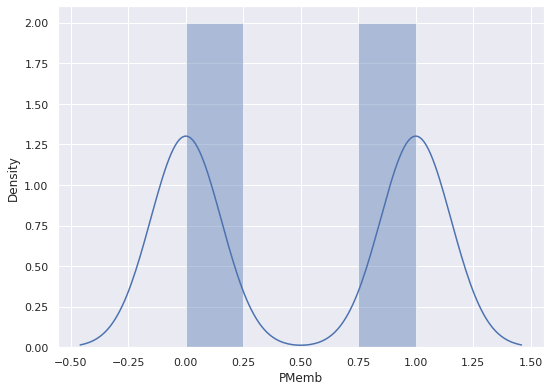

In [40]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [41]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

186

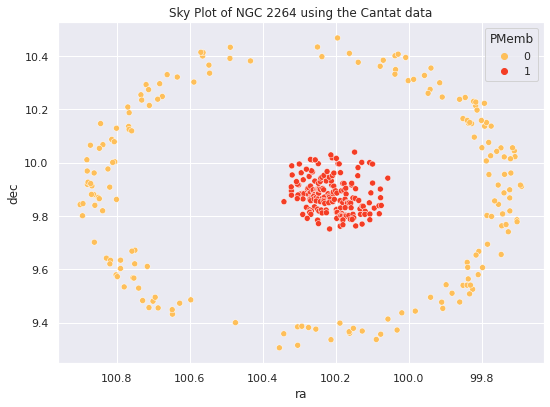

In [42]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'PMemb', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 2264 using the Cantat data')
plt.show()

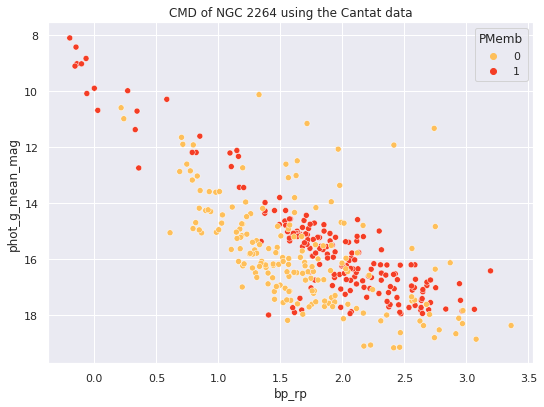

In [43]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
cmd.invert_yaxis()
plt.title('CMD of NGC 2264 using the Cantat data')
plt.show()

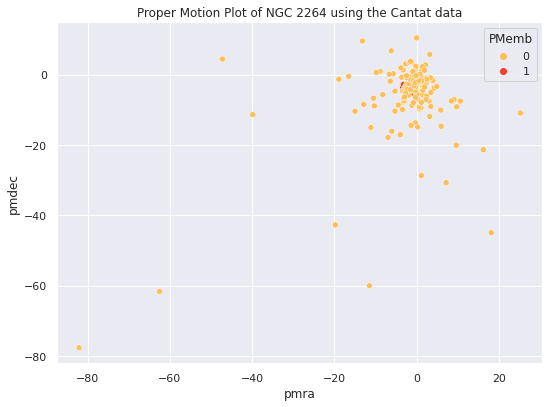

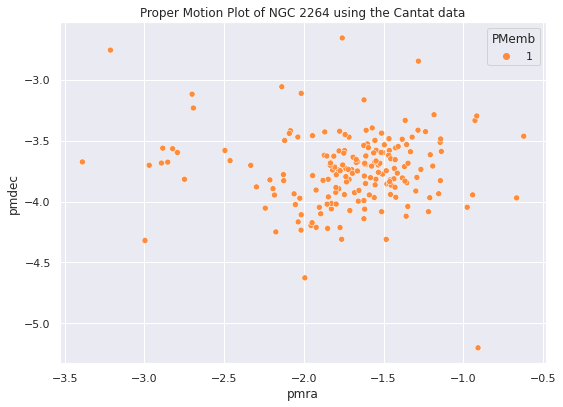

In [44]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 2264 using the Cantat data')
plt.show()
pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = member)
plt.title('Proper Motion Plot of NGC 2264 using the Cantat data')
plt.show()

In [45]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.651521
pmdec       0.275936
pmra        0.072543
dtype: float64

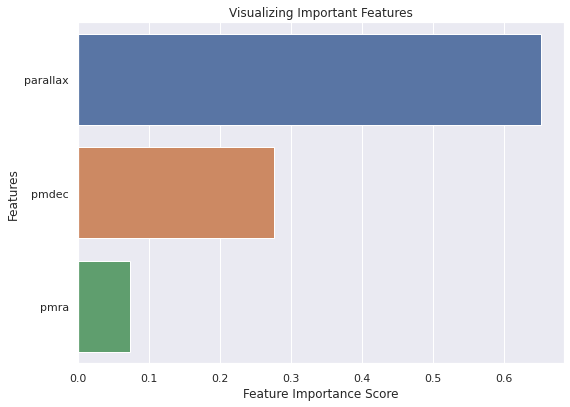

In [47]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [48]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [49]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [50]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.9104102622950819

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


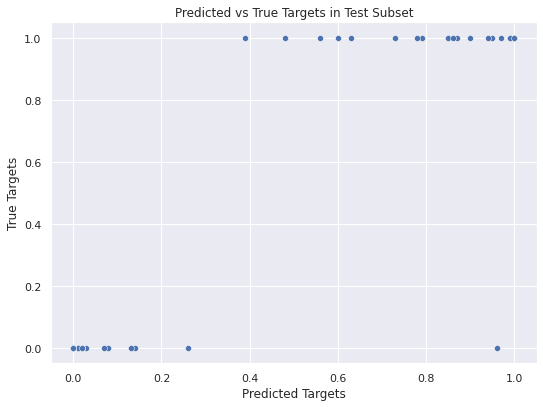

In [52]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [53]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [54]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.5799588469279573, 0.6738451681874092, 0.7628358246776703, 0.7798255193113657, 0.7963902973150626, 0.8136492250662043, 0.8279826847326366, 0.831299248295869, 0.8281904661516524, 0.8391969948366882, 0.8559521563532424, 0.8399204289329061, 0.8347236554720879, 0.8602908944402585, 0.8303578764549684, 0.8488890338483094, 0.8489358743129655, 0.8384591378418806, 0.8759435542235542]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


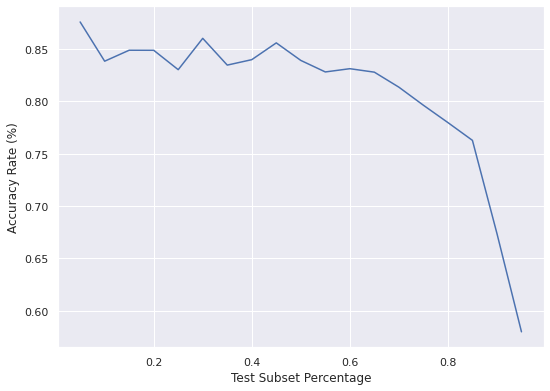

In [55]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [56]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_2264_center
count,4.209000e+03,4.209000e+03,4.209000e+03,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4160.000000,4209.000000,4.160000e+03,4160.000000,4160.000000,4160.000000,4160.000000,4209.000000,4160.000000,4160.000000,4160.000000,140.000000,140.000000,4209.000000,140.000000,140.000000,140.000000,4209.000000,4209.000000,4209.000000,4209.000000,2850.000000,2850.000000,2850.000000,2850.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,2217.0,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,4209.000000,4209.000000
mean,1.635721e+18,3.329262e+18,8.487577e+08,2015.5,100.275401,0.098450,9.877182,0.096800,1.338809,0.109819,17.741106,-0.652950,0.194286,-4.772365,0.174934,-0.196058,0.063463,-0.168232,0.232723,-0.375833,0.117672,-0.298221,0.230852,0.100219,-0.172865,139.053932,8.450463,138.276550,0.777382,2.428583,259.291992,0.203232,5.436117,31.0,27.405605,1.422467,0.024504,-0.068207,15.874555,10.358755,...,16.876694,14.006652,6.041628e+04,201.981362,321.423370,15.094655,1.409707,0.075790,1.782041,0.837812,0.944229,20.796022,2.695563,0.149442,5380.356934,3.510714,-0.130357,202.966672,2.217217,100.398843,-13.191595,100101.458596,4599.360840,4403.150391,4919.838867,1.224163,1.002807,1.488345,0.612449,0.498369,0.747957,200111.0,2.347431,2.066890,2.541534,5.254851,4.466474,6.043223,0.394787,0.394779
std,0.000000e+00,7.298888e+15,4.894245e+08,0.0,0.317892,0.090569,0.281063,0.088542,1.266744,0.095890,23.484699,7.543080,0.177949,9.743828,0.167849,0.196506,0.167184,0.223904,0.213840,0.148562,0.225215,0.219095,0.116781,0.118576,0.201381,21.057131,32.871133,20.961082,1.320215,7.923064,1494.834473,0.353870,67.703592,0.0,68.493042,0.119940,0.022126,0.099413,2.313570,0.823011,...,2.115206,2.979246,4.366345e+05,3301.497250,268.018372,1.689929,0.210417,0.302408,0.617393,0.370477,0.283547,24.757291,3.294309,0.861762,722.498169,0.567298,0.421401,0.292046,0.303155,0.322062,0.280590,436.727627,917.701416,877.202759,931.299805,0.950812,0.895314,0.993233,0.479336,0.448083,0.505118,0.0,3.610377,3.271441,3.890540,25.112701,20.849522,29.529799,0.147449,0.147443
min,1.635721e+18,3.326589e+18,3.434770e+05,2015.5,99.686511,0.018986,9.300819,0.018367,0.178120,0.020885,5.001782,-121.700273,0.037346,-153.349377,0.033250,-0.985580,-0.685270,-0.885211

In [57]:
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)

In [58]:
# select the set of predictor variables from the new dataset
new_features = all_stars_filtered.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [59]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
# estimate the membership probability of the stars
all_stars_filtered['PMemb'] = rfr.predict(new_features)
sum(all_stars_filtered['PMemb'] >= 0.5)

877

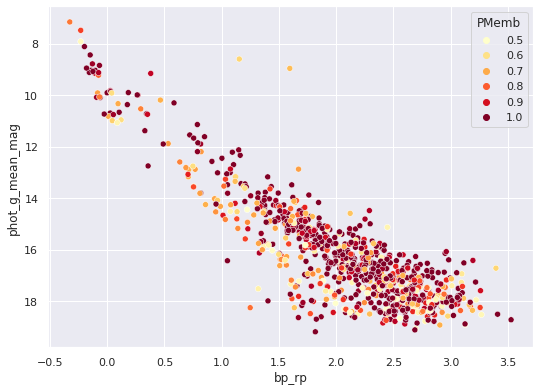

In [61]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
cmd.invert_yaxis()

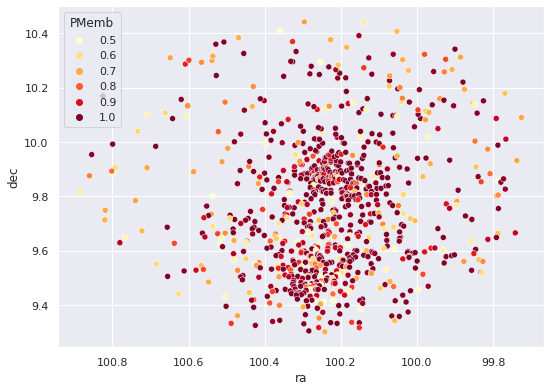

In [62]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

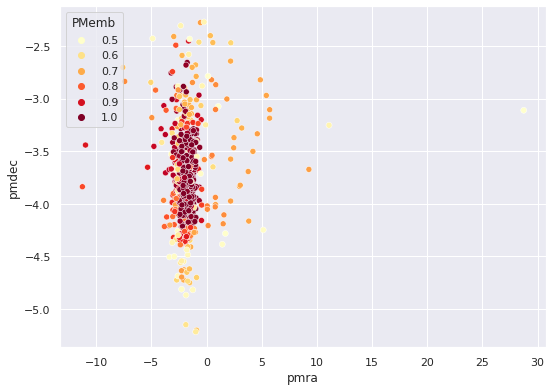

In [63]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )

In [64]:
potentialMember = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5]
len(potentialMember)

877

In [65]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_2264_center,PMemb
count,8.770000e+02,8.770000e+02,8.770000e+02,877.0,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.0,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,...,877.000000,8.690000e+02,869.000000,869.000000,869.000000,869.000000,877.000000,869.000000,869.000000,869.000000,13.000000,13.000000,877.000000,13.000000,13.000000,13.000000,877.000000,877.000000,877.000000,877.000000,536.000000,536.000000,536.000000,536.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,484.0,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,877.000000,877.000000,877.000000
mean,1.635721e+18,3.327337e+18,8.471120e+08,2015.5,100.231063,0.097509,9.765705,0.094860,1.354432,0.108982,18.380789,-1.746039,0.189195,-3.703443,0.165494,-0.141300,0.007159,-0.226552,0.272087,-0.353924,0.162199,-0.356774,0.243323,0.095578,-0.120982,142.700114,11.379704,141.924743,0.775371,3.391582,239.381561,0.260529,3.758431,31.0,23.392307,1.379392,0.025490,-0.038533,16.324971,10.445838,...,14.438997,1.016482e+05,329.216363,184.176773,15.041936,1.497365,0.069555,2.017756,0.967125,1.050632,14.526771,5.742182,0.070696,6057.692383,3.807692,-0.230769,203.046041,2.127420,100.362434,-13.306183,100299.798507,4583.844727,4319.520020,4969.459961,1.560399,1.289929,1.800432,0.784906,0.643927,0.907720,200111.0,1.460106,1.257554,1.594778,2.299674,2.152976,2.446373,0.297325,0.297333,0.890525
std,0.000000e+00,3.693627e+15,4.975301e+08,0.0,0.185558,0.060964,0.244491,0.058962,0.117840,0.066226,12.047687,1.708909,0.117716,0.408751,0.104503,0.179937,0.151983,0.167134,0.149266,0.141313,0.160633,0.143372,0.110620,0.106854,0.177590,19.334183,38.896634,19.194303,1.285122,6.283006,385.592621,0.270787,14.439885,0.0,62.165997,0.136599,0.016005,0.092902,2.146565,0.736118,...,2.970169,5.584462e+05,1623.965043,217.009827,1.810283,0.242741,0.284206,0.719874,0.424588,0.341948,16.584065,3.550231,0.604036,587.667053,0.480384,0.563301,0.238512,0.190791,0.189468,0.243319,713.359909,1382.022217,1246.942017,1419.174438,1.028672,0.964137,1.064962,0.520728,0.484659,0.544522,0.0,1.555874,1.464386,1.609327,15.452661,14.589272,16.321018,0.156838,0.156844,0.154063
min,1.635721e+18,3.326589e+18,5.929410e+05,2015.5,99.725130,0.020872,9.300819,0.019971,1.086733,0.021649,5.004199,-11.257704,0.039281,-5.215559,0.035394,-0.960296,-0.685270,-0.885211,-0.927026,-0.799647,-0.934734,-0.933394,-0.694126,-0.667703,-0.966570,60.000000,0.00000

In [66]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_2264_center
count,1.860000e+02,1.860000e+02,1.860000e+02,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,186.000000,181.000000,181.000000,181.000000,3.000000,3.000000,186.000000,3.000000,3.000000,3.0,186.000000,186.000000,186.000000,186.000000,144.000000,144.000000,144.000000,144.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,186.000000,186.0,186.000000
mean,1.635721e+18,3.326784e+18,8.280865e+08,2015.5,100.213468,0.072569,9.878067,0.071833,1.351573,0.082092,21.600460,-1.713496,0.141594,-3.743843,0.125631,-0.124861,-0.013726,-0.229716,0.284783,-0.384964,0.183260,-0.358689,0.201911,0.089182,-0.101047,152.795699,16.935484,151.849462,0.946237,4.115653,297.708801,0.212232,4.696803,31.0,28.146078,1.399801,0.018506,-0.034812,17.408602,10.634409,...,15.182796,1.233644e+05,344.702351,186.840729,14.525523,1.473558,0.129032,1.860670,0.859732,1.000938,17.663946,6.709235,0.102151,5833.333496,3.833333,0.0,202.938125,2.163288,100.336265,-13.195483,100556.638889,4531.785645,4245.856934,4903.776855,1.747458,1.442371,1.986919,0.877488,0.713944,1.003771,200111.0,1.408721,1.217725,1.548704,1.195101,1.119065,1.271138,0.104799,1.0,0.104797
std,0.000000e+00,8.928187e+13,5.066211e+08,0.0,0.061261,0.039365,0.063839,0.039039,0.098563,0.044521,10.954170,0.445249,0.075890,0.300878,0.066840,0.170140,0.137864,0.135644,0.134800,0.126800,0.131831,0.117655,0.115029,0.110401,0.184023,17.309931,47.414402,17.351655,1.487720,8.044185,624.008545,0.227853,18.451157,0.0,72.081253,0.133535,0.009988,0.079043,1.949284,0.678392,...,3.662657,4.757823e+05,939.250760,185.163849,1.783509,0.223517,0.408711,0.683421,0.381192,0.347672,6.235787,4.756371,0.808934,288.675140,0.577350,0.0,0.057887,0.066118,0.061034,0.064705,898.928007,1413.615601,1237.765991,1462.936523,0.987902,0.909715,1.042373,0.494933,0.455351,0.527763,0.0,0.618332,0.618088,0.611171,3.740212,3.529193,3.951503,0.057036,0.0,0.057038
min,1.635721e+18,3.326712e+18,5.929410e+05,2015.5,100.057096,0.023724,9.751314,0.022577,1.092609,0.026016,6.027352,-3.389699,0.045983,-5.199818,0.041781,-0.960296,-0.685270,-0.885211,-0.377267,-0.702543,-0.271878,-0.933394,-0.694126,-0.667703,-0.896725,105.000000,0.000000,101.000000,0.000000,-6.497139,53.549519,0.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


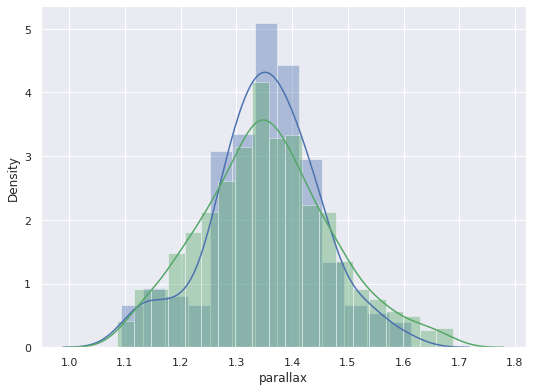

In [67]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


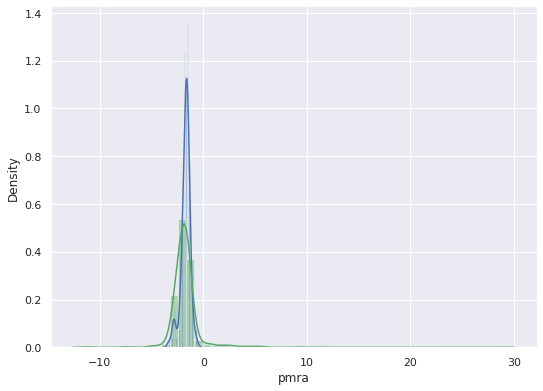

In [68]:
sns.distplot(member['pmra'], color = 'b')
sns.distplot(potentialMember['pmra'], color = 'g')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


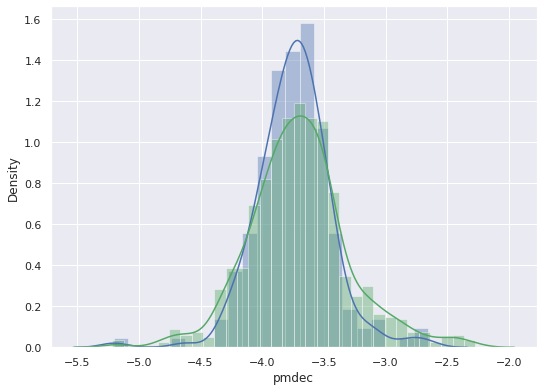

In [69]:
sns.distplot(member['pmdec'], color = 'b')
sns.distplot(potentialMember['pmdec'], color = 'g')

In [70]:
# saving the files as csv
# all_stars.to_csv('gaia_2264_membership_prob.csv')

potentialMember.to_csv('NGC_2264_membership_prob.csv')


### Comparing the new and old probable members

In [71]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [72]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2264_center,PMemb,dataset
3,1635721458409799680,Gaia DR2 3326740006577519360,3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,-0.130383,...,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.968913,2.235852,100.416360,-13.184037,100001,9670.666992,9200.250000,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008433,0.008438,1.00,New_member
5,1635721458409799680,Gaia DR2 3326740075296996608,3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.852173,0.288888,3.174382,31,False,3.599010,1.383417,0.018468,-0.147385,...,15.368563,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.966781,2.231493,100.411398,-13.184484,100001,3608.004883,3417.000000,4477.879883,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,https://gea.esac.esa.int/data-server/datalink/...,,0.010309,0.010310,1.00,New_member
6,1635721458409799680,Gaia DR2 3326740002281694592,3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.967285,0.141880,6.011601,31,False,36.901455,1.779420,0.013208,-0.156618,...,10.136516,1.153538,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.972026,2.238207,100.420088,-13.185468,100002,8748.333008,7420.000000,9705.000000,0.0870,0.0379,0.2241,0.0435,0.0146,0.1121,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.010362,0.010370,1.00,New_member
7,1635721458409799680,Gaia DR2 3326740075296996736,3326740075296996736,289548265,2015.5,100.286887,0.092189,9.883634,0.082626,1.443122,0.093037,15.511223,-1.464500,0.173904,-3.853637,0.155394,-0.247701,0.274339,-0.372806,0.185210,-0.295910,0.125538,-0.424320,0.115379,0.086176,-0.158110,161,0,161,0,2.295916,199.383438,0.270272,1.541566,31,False,2.265055,1.282532,0.021110,-0.098726,...,15.966477,1.635123,0,2.294858,1.039610,1.255248,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,202.966218,2.230183,100.409948,-13.184684,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,N

In [73]:
concatenated.dataset.value_counts()

New_member    877
Old_member    186
Name: dataset, dtype: int64

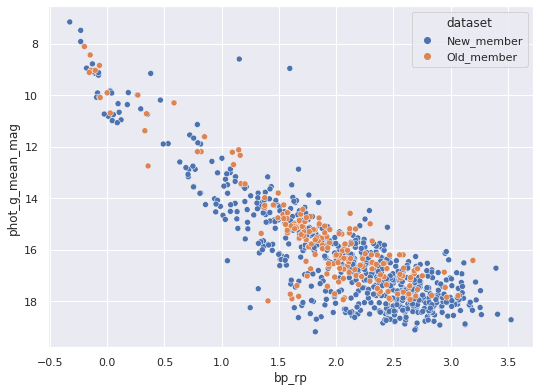

In [74]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

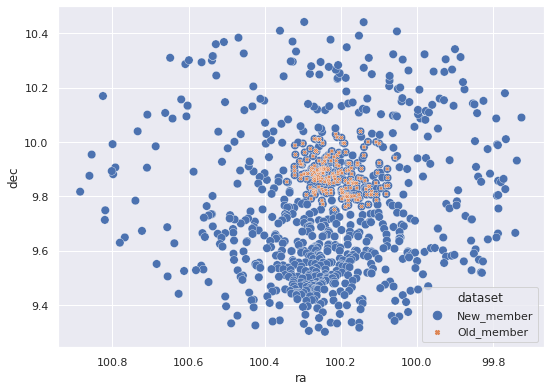

In [75]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='dataset', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

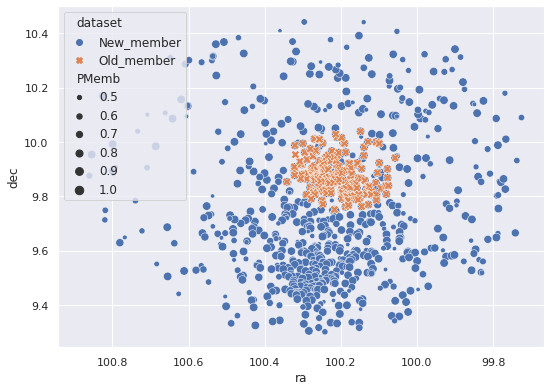

In [76]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

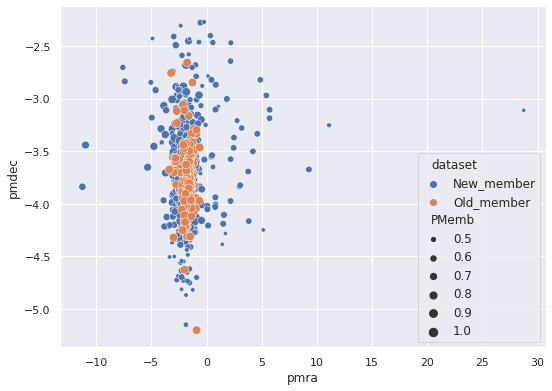

In [77]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [78]:
# pd_prof.ProfileReport(potentialMember)

In [91]:
#files.download('NGC_2264_cantat.csv')

files.download('NGC_2264_membership_prob.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


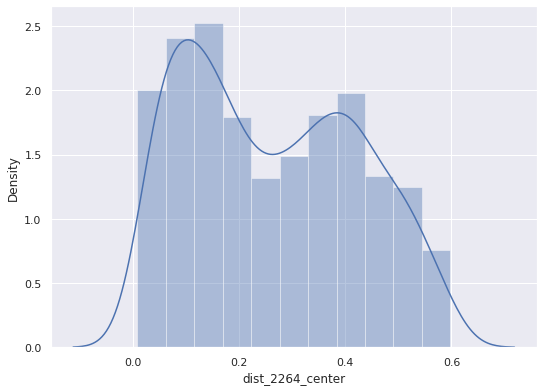

In [80]:
sns.distplot(concatenated['dist_2264_center'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


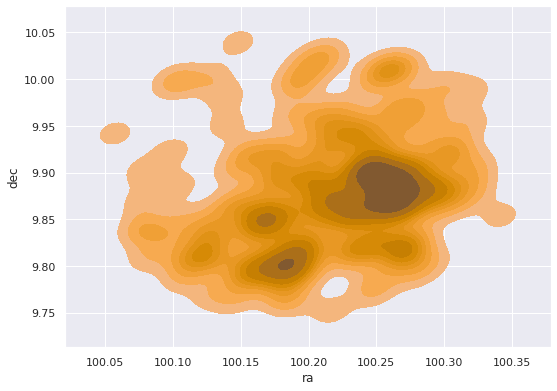

In [88]:
sns.kdeplot('ra', 'dec', data = member, shade=True, color = 'orange', bw = 0.20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


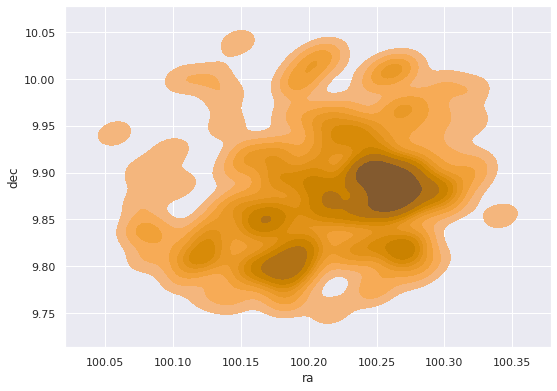

In [89]:
sns.kdeplot('ra', 'dec', data = cantat_2264[cantat_2264['PMemb'] >= 0.5], shade=True, color = 'orange', bw = 0.20)

In [83]:
len(cantat_2264[cantat_2264['PMemb'] >= 0.5])

173

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


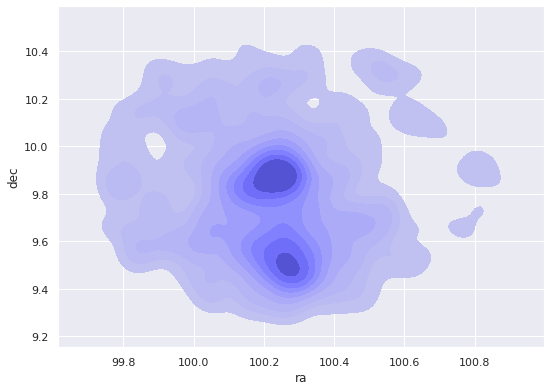

In [90]:
sns.kdeplot('ra', 'dec', data = potentialMember, shade=True, color = 'blue', bw = 0.20)

In [85]:
potentialMember['radial_velocity'].dropna()

64       15.773526
79       24.626197
895      12.592116
3455    -15.290800
8164     15.760693
10324    24.478727
12105     6.748141
12557    31.172821
13863     7.140792
18662    52.681456
21311     4.489079
23623    -0.515422
25090     9.190690
Name: radial_velocity, dtype: float64

In [86]:
member['radial_velocity'].dropna()

64     15.773526
79     24.626197
895    12.592116
Name: radial_velocity, dtype: float64

In [87]:
member['radial_velocity_error'].dropna()

64      1.418487
79      8.078268
895    10.630951
Name: radial_velocity_error, dtype: float64